In [ ]:
# 1.Convert the above paragraph into vectors using:<br>
'''i) Word2vec
    ii) USE
iii)ELMO
iv) GP2
v) Sentence-BERT'''

In [1]:
my_string='''paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin 
and end, and thus help the reader see the organization of the essay and grasp its main points.

Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point.  It  might  describe  a  place like kolkata,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into 
categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One 
of the most important of these is a topic sentence.'''


In [2]:
import numpy as np
import nltk
import re
import gensim
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim import corpora,models,similarities
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#1) Word2Vec

In [3]:
#code to convert paragraph to sentences
def essay_to_sentences(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(paragraph.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append((raw_sentence))
    return sentences

sentences=essay_to_sentences(my_string)

sentences


['paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.',
 'Almost  every  piece  of  writing  you  do  that  is \nlonger  than  a  few  sentences  should  be  organized  into  paragraphs.',
 'This  is because paragraphs show a reader where the subdivisions of an essay begin \nand end, and thus help the reader see the organization of the essay and grasp its main points.',
 'Paragraphs  can  contain  many  different  kinds  of  information.',
 'A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a \ngeneral  point.',
 'It  might  describe  a  place like kolkata,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into \ncategories;  or  describe  causes  and  effects.',
 'Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics.',
 'One \nof the most important of these is a topic s

In [4]:
wordvecs=[nltk.word_tokenize(sent) for sent in sentences]
from nltk.corpus import stopwords
nltk.download('stopwords')
stops=list(set(stopwords.words("english")))


for i in wordvecs:
  for j in i:
    if j in stops:
      i.remove(j)
    elif len(j)==1:
      i.remove(j)

model=gensim.models.Word2Vec(wordvecs,min_count=1,size=32)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
  #printing vector form of word 'paragraph'
  model['paragraph']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.00382695, -0.0112763 , -0.00959446, -0.01312805, -0.01010687,
       -0.0040552 , -0.01122793, -0.01398515, -0.00795684, -0.00081819,
        0.00026197,  0.00470892,  0.01161019,  0.01174703, -0.01371327,
        0.01427639, -0.0081336 ,  0.01449484,  0.00125633,  0.01471118,
       -0.00825177, -0.00621981, -0.00432782, -0.0099471 ,  0.0066074 ,
        0.00954392, -0.00651211,  0.00244293, -0.00839869,  0.01557246,
       -0.01380106, -0.01414949], dtype=float32)

In [6]:
#finding similar words of word 'sentence' in given paragraph
model.most_similar('sentence')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('illustration', 0.4837343990802765),
 ('piece', 0.4603816866874695),
 ('certain', 0.4469294250011444),
 ('character', 0.43135929107666016),
 ('organized', 0.34668463468551636),
 ('these', 0.33380424976348877),
 ('begin', 0.29665982723236084),
 ('effects', 0.2749797999858856),
 ('process', 0.25456249713897705),
 ('topic', 0.2502039074897766)]

In [ ]:
#2. USE

In [7]:
#importing USE model
import tensorflow_hub as hub
use= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#converting to vectors
embeddings=use(sentences)
print(embeddings)

tf.Tensor(
[[ 0.0130397  -0.02448178  0.05377616 ... -0.08659647  0.01437556
   0.04036802]
 [ 0.02902018 -0.00415597  0.07664446 ... -0.06830524 -0.00835191
   0.04397805]
 [ 0.07023076 -0.02952436  0.04878015 ... -0.06741599  0.02838855
   0.06126793]
 ...
 [ 0.04487116 -0.0484449   0.05696819 ... -0.06665879  0.03268223
   0.03346183]
 [ 0.04141247  0.0258891  -0.00625629 ... -0.0216299   0.00910816
   0.03623573]
 [ 0.00255486 -0.05832284  0.01486255 ... -0.09906971 -0.07840379
   0.06731212]], shape=(8, 512), dtype=float32)


In [8]:
print("shape= ",embeddings[0].shape)
#each sentence is converted into vector having 512 values
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings[0]))

shape=  (512,)
The sentence:  paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 is converted as : 
[ 0.0130397  -0.02448178  0.05377616  0.09029772 -0.00281371 -0.01281828
  0.03285866  0.01635625 -0.06859536  0.06464799 -0.00420633 -0.00475263
 -0.0616823   0.02333648 -0.0740284  -0.09213066 -0.04730163  0.03868826
 -0.09117856 -0.0531873   0.0045717   0.06571639 -0.00334152  0.05408446
 -0.02477303  0.02715091 -0.02349129 -0.05725229 -0.01281677 -0.02824831
  0.08104642 -0.01898845  0.00283233 -0.01492393 -0.0671662   0.01855971
  0.05093659  0.0259113   0.01541285  0.02317855  0.01918534  0.04582307
  0.03908791  0.03328896  0.05890476  0.03568182  0.00344607 -0.05167899
 -0.03721966  0.02001154  0.00619585  0.05630827  0.00328268 -0.02715196
 -0.04551012 -0.01019349  0.01659425  0.05470299  0.0246249   0.02216954
 -0.00490041 -0.03435751  0.05740487  0.06339793  0.05196239  0.00615372
  0.04076186 -0.02079652  0.060018

In [ ]:
#3. SENTENCE BERT

In [9]:
#importing sentencebert model
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings2=bert(sentences)
print(embeddings2)

tf.Tensor(
[[ 0.5779494   0.02082791  0.09225276 ...  0.1423439   0.0289949
  -0.15707761]
 [ 0.5166956   0.00863559  0.13047293 ...  0.06873029  0.04432377
   0.02298209]
 [ 0.7741569   0.20155099 -0.06426485 ... -0.15599789  0.10988081
   0.10273374]
 ...
 [ 0.49916965 -0.00334622  0.08184471 ...  0.05571959 -0.09832127
  -0.04315813]
 [ 0.2909918   0.06627773  0.08403497 ... -0.10017543 -0.11646989
   0.00867226]
 [ 0.3799187  -0.05745781  0.09742597 ...  0.0461409  -0.07855327
   0.03973798]], shape=(8, 128), dtype=float32)


In [10]:
print("shape=",embeddings2[0].shape)
#each sentence is converted into vector having 128 values
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings2[0]))

shape= (128,)
The sentence:  paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 is converted as : 
[ 5.77949405e-01  2.08279062e-02  9.22527611e-02  4.76201549e-02
 -1.17820695e-04 -7.91035891e-02 -9.09532905e-02 -1.96999479e-02
 -1.82167172e-01  1.82781354e-01  1.78407803e-02 -1.36595681e-01
 -1.20970421e-01  3.03527750e-02 -1.55288994e-01 -3.65624130e-02
 -8.87916684e-02  1.18960990e-02 -2.42571995e-01  1.40147313e-01
  6.29373714e-02  1.13711674e-02  2.64876569e-03 -7.81569928e-02
  5.36865816e-02 -9.01894644e-02 -6.66456744e-02 -4.82053608e-02
 -3.14572081e-02  3.31105255e-02  2.45857425e-03 -5.02937846e-02
 -4.58035916e-02 -2.23965168e-01 -1.51718352e-02 -2.75546517e-02
  5.16168959e-02 -1.21403374e-01 -2.82064285e-02  2.14980636e-02
  9.37252939e-02 -7.97212273e-02  2.16491118e-01 -4.78220843e-02
 -5.53186908e-02  1.48325905e-01  1.11704050e-02 -1.39561430e-01
 -8.59184787e-02 -3.15666497e-02 -7.05443416e-03 -1.229588

In [ ]:
#4. implementing ELMOS

In [ ]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

In [12]:
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
#1024 sized vectors
elmo=hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)
embeddings=elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
print("\n\n")
print(sess.run(embeddings[0]))
print("shape=",embeddings[0].shape)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.





[[ 0.12622021  0.43023553  0.4043871  ...  0.22031897  0.26976916
   0.46307242]
 [-0.0062146   0.333897    0.10469673 ... -0.6755089   0.25390008
   0.654027  ]
 [ 0.00899898  0.4038667   0.13564664 ... -0.04539599  0.19543737
  -0.34905794]
 ...
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]]
shape= (32, 1024)


In [ ]:
#5. GPT2 

In [13]:
import torch
import transformers

In [14]:
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
output=gptokenizer.encode(my_string,add_special_tokens=False,return_tensors="pt")

In [24]:
print("shape=",output.shape)
output

shape= torch.Size([1, 256])


tensor([[20360,   318,   257,  2168,   286, 13439,   326,   389,  8389,   290,
         24870,    11,   290,   389,   477,   220,  3519,   220,   284,   220,
           257,   220,  2060,   220,  7243,    13,   220, 16699,   220,   790,
           220,  3704,   220,   286,   220,  3597,   220,   345,   220,   466,
           220,   326,   220,   318,   220,   198,  6511,   263,   220,   621,
           220,   257,   220,  1178,   220, 13439,   220,   815,   220,   307,
           220,  8389,   220,   656,   220, 23549,    13,   220,   770,   220,
           318,   780, 23549,   905,   257,  9173,   810,   262, 45944,  3279,
           286,   281, 14268,  2221,   220,   198,   392,   886,    11,   290,
          4145,  1037,   262,  9173,   766,   262,  4009,   286,   262, 14268,
           290, 13180,   663,  1388,  2173,    13,   198,   198, 10044,  6111,
            82,   220,   460,   220,  3994,   220,   867,   220,  1180,   220,
          6982,   220,   286,   220,  1321,    13,  



---



---



In [ ]:
# 2. Find named entities (NER) for the above paragraph?

In [16]:

import spacy
from spacy import displacy
ner=spacy.load('en')
result=ner(my_string)

for word in result.ents:
  print(word.text,word.label_)

kolkata PERSON
two CARDINAL
One CARDINAL


In [17]:
spacy.explain('GPE')

'Countries, cities, states'

In [18]:
#better visualisation of entity recognition
displacy.render(result,style="ent",jupyter=True)

In [19]:
# finding named entities of another paragraph
resultss=ner("Cricket was introduced to India by British sailors in the 18th century, and the first cricket club was established in 1792. India's national cricket team did not play its first Test match until 25 June 1932 at Lord's, becoming the sixth team to be granted test cricket status. From 1932 India had to wait until 1952, almost 20 years for its first Test victory. In its first fifty years of international cricket, India didn't gain much success, winning only 35 of the first 196 Test matches it played. The team, however, gained strength in the 1970s with the emergence of players like Gavaskar, Viswanath, Kapil Dev, and the Indian spin quartet.")
for word in resultss.ents:
  print(word.text,word.label_)

India GPE
British NORP
the 18th century DATE
first ORDINAL
1792 DATE
India GPE
first ORDINAL
25 June 1932 DATE
sixth ORDINAL
1932 DATE
India GPE
1952 DATE
almost 20 years DATE
first ORDINAL
its first fifty years DATE
India GPE
only 35 CARDINAL
first ORDINAL
196 CARDINAL
the 1970s DATE
Gavaskar PERSON
Viswanath ORG
Kapil Dev PERSON
Indian NORP


In [20]:
#better visualisation of entity recognition
displacy.render(resultss,style="ent",jupyter=True)



---



---



In [ ]:
#3. Find similar sentences(repeated sentences) from the above paragraph?

In [ ]:
pip install -U sentence-transformers

In [22]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [23]:
se_embeddings = sbert_model.encode(sentences)
q1_vec= sbert_model.encode(sentences[0])

#cosine similarity function
#identifies similarity between 2 sentences
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

for sent in sentences:
  sim = cosine(q1_vec, sbert_model.encode([sent])[0])
  #if similarity ==1 => repeated sentence
  #if similarity > 0.6 => similar sentence
  if sim>0.6:
    print("Sentence1 =",sentences[0],"\n \nSentence2=", sent, "\n\nsimilarity = ", sim,end="\n ----------------------------- \n")


Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 

similarity =  1.0
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs. 

similarity =  0.64265954
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic. 
 
Sentence2= A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point. 

similarity =  0.6779764
 ----------------------------- 
Sentence1 = paragraph is a series of sentences that are or



---



---



In [ ]:
#4. Explain POS tagging with HMM?

Parts of Speech Tagging (POS):
It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on.
reading a sentence and being able to identify what words act as nouns, pronouns, verbs, adverbs, and so on. All these are referred to as the part of speech tags. <br>
&emsp; According to Wikipedia, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context i.e. its relationship with adjacent and related words in a phrase, sentence, or paragraph.

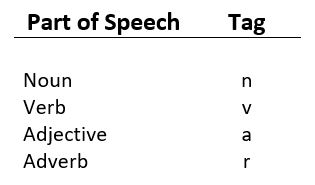

Default tagging is a basic step for the part-of-speech tagging. It is performed using the DefaultTagger class. The DefaultTagger class takes ‘tag’ as a single argument. NN is the tag for a singular noun. DefaultTagger is most useful when it gets to work with most common part-of-speech tag.
that’s why a noun tag is recommended.

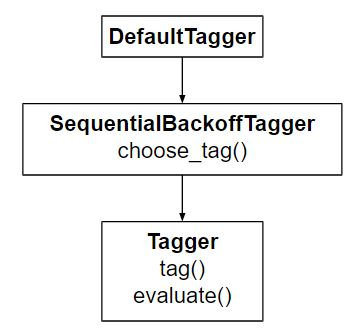

## POS tagging with Hidden Markov Model
HMM (Hidden Markov Model) is a Stochastic technique for POS tagging. Hidden Markov models are known for their applications to reinforcement learning and temporal pattern recognition such as speech, handwriting, gesture recognition, musical score following, partial discharges, and bioinformatics.

Let us consider an example proposed by Dr.Luis Serrano and find out how HMM selects an appropriate tag sequence for a sentence.



<center><img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/04/16134154/pos2.png" ></center>

In this example, we consider only 3 POS tags that are noun, model and verb. Let the sentence “ **Ted will spot Will** ” be tagged as noun, model, verb and a noun and to calculate the probability associated with this particular sequence of tags we require their ***Transition probability and Emission probability.***

The ***transition probability*** is the likelihood of a particular sequence for example, how likely is that a noun is followed by a model and a model by a verb and a verb by a noun. This probability is known as Transition probability. It should be high for a particular sequence to be correct.

Now, what is the probability that the word Ted is a noun, will is a model, spot is a verb and Will is a noun. These sets of probabilities are ***Emission probabilities*** and should be high for our tagging to be likely.

Let us calculate the above two probabilities for the set of sentences below

<li> Mary Jane can see Will
<li> Spot will see Mary
<li> Will Jane spot Mary?
<li> Mary will pat Spot

**Note** that Mary Jane, Spot, and Will are all names.

<center><img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/04/17112900/pos3-1.png">

In the above sentences, the word Mary appears four times as a noun. and see appears two times as a verb. we need to calculate the probabilitiy of a word appearing as noun, verb or model. to do this, we need to calculate the emission probabilities, which represented using below table.

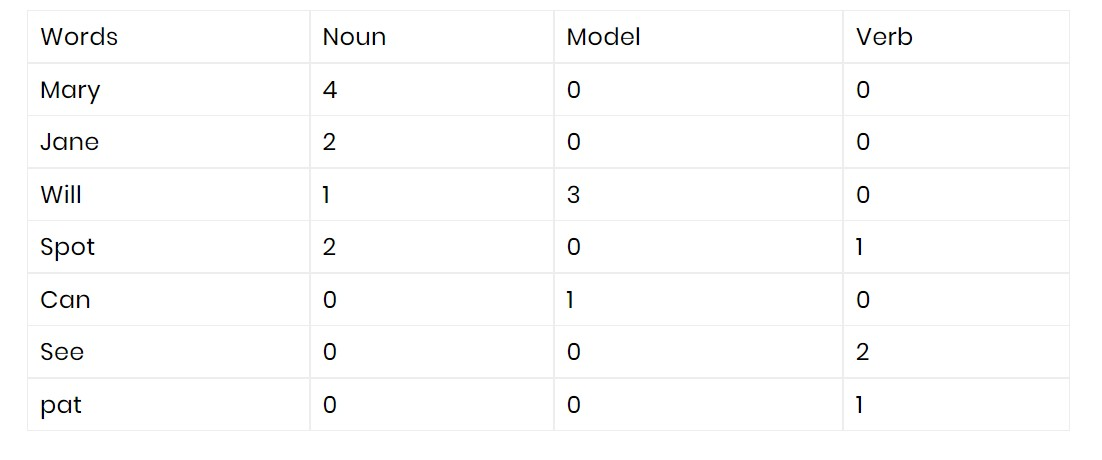

Now divide each column by the total number of their appearances .for example, ‘noun’ appears nine times in the above sentences, so divide each term by 9 in the noun column. and repeat the same for all remaining processes. We get the following table after this operation. 

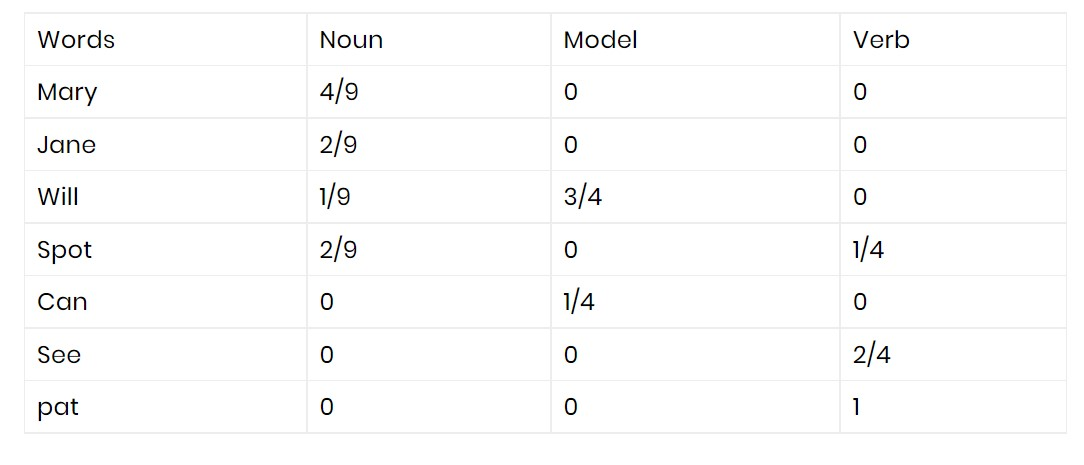

From the above table, we can conclude that

The probability that Mary is Noun = 4/9

The probability that Mary is Model = 0

The probability that Mary is Verb = 0

The probability that Will  is Noun = 1/9

The probability that Will is Model = 3/4

In a similar manner, we can analyze  rest of the probabilities. These are the **emission probabilities.**

Next, we have to calculate the transition probabilities, so define two more tags < S > and < E >. < S > is placed at the beginning of each sentence and < E > at the end as shown in the figure below.

since for first and last word there is no previous and next words, so we are adding extra dummy words. i.e < E > and < S >

<center><img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/04/16134911/pos4.png">

now we need to create a table and fill it with the co-occurrence counts of the tags.

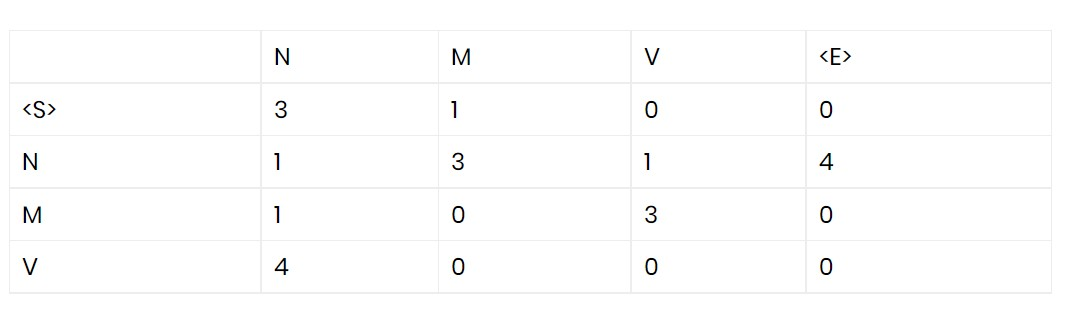

In the above figure, we can see that the < S > tag is followed by the N tag three times, thus the first entry is 3.The model tag follows the < S > just once, thus the second entry is 1. In a similar manner, the rest of the table is filled.

Next, we divide each term in a row of the table by the total number of co-occurrences of the tag in consideration, for example, The Model tag is followed by any other tags four times (in total) as shown below, thus we divide each element in the third row by four.

<center><img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/04/16135032/pos-5.png">

the table is refined as below:


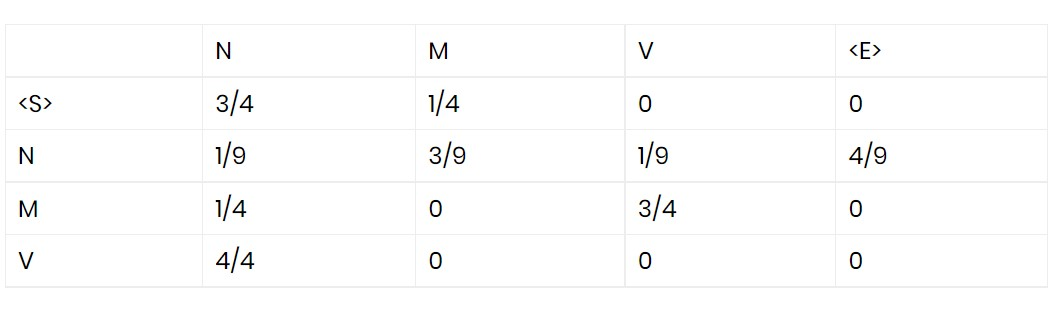



These are the respective transition probabilities for the above four sentences.

how does the HMM determine the appropriate sequence of tags for a particular sentence from the above tables? Let us find it out.

Take a new sentence and tag them with wrong tags. Let the sentence, ‘ Will can spot Mary’  be tagged as-

Will as a  model
Can as a verb
Spot as a noun
Mary as a noun
Now calculate the probability of this sequence being correct in the following manner.

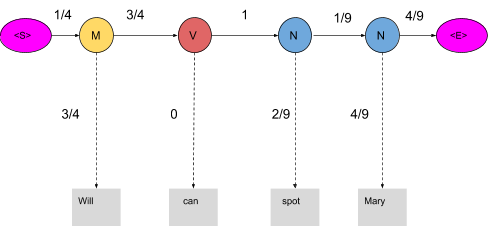

The probability of the tag Model (M) comes after the tag is ¼ as seen in the table. 
Also, the probability that the word Will is a Model is 3/4. In the same manner, we calculate each and every probability in the graph.
Now the product of these probabilities is the likelihood that this sequence is right. Since the tags are not correct, the product is zero.

1/4*3/4*3/4*0*1*2/9*1/9*4/9*4/9=0

When these words are correctly tagged, we get a probability greater than zero as shown below

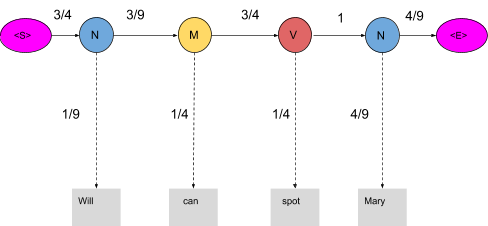

Calculating  the product of these terms we get,

3/4*1/9*3/9*1/4*3/4*1/4*1*4/9*4/9=0.00025720164

For our example, keeping into consideration just three POS tags we have mentioned, 81 different combinations of tags can be formed. In this case, calculating the probabilities of all 81 combinations seems achievable. But when the task is to tag a larger sentence and all the POS tags in the Penn Treebank project are taken into consideration, the number of possible combinations grows exponentially and this task seems impossible to achieve. Now let us visualize these 81 combinations as paths and using the transition and emission probability mark each vertex and edge as shown below.

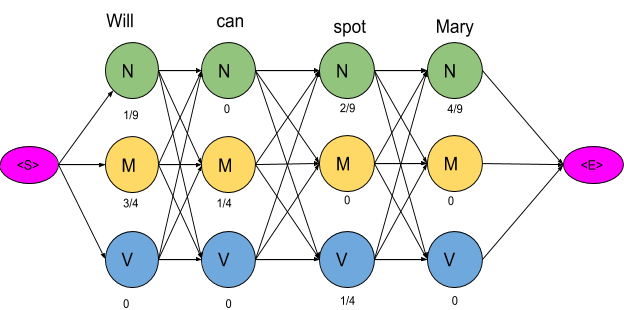

The next step is to delete all the vertices and edges with probability zero, also the vertices which do not lead to the endpoint are removed. Also, we will mention-

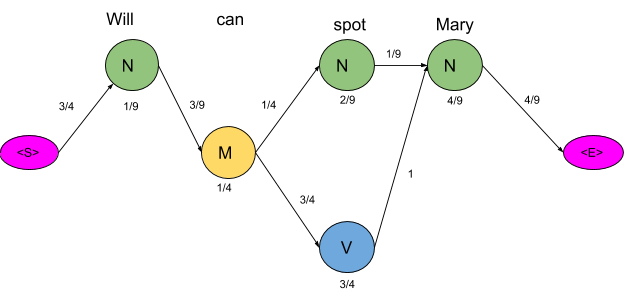

Now there are only two paths that lead to the end, let us calculate the probability associated with each path.

s→N→M→N→N→ E =3/4*1/9*3/9*1/4*1/4*2/9*1/9*4/9*4/9=0.00000846754

s→N→M→N→V→E=3/4*1/9*3/9*1/4*3/4*1/4*1*4/9*4/9=0.00025720164

Clearly, the probability of the second sequence is much higher and hence the HMM is going to tag each word in the sentence according to this sequence.